<a href="https://colab.research.google.com/github/tomonari-masada/course2022-stats2/blob/main/05_divergent_transitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. „Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂ†¥Âêà„ÅÆ‰æã
* ÂØÜÂ∫¶Èñ¢Êï∞„Ååhigh curvature„Åß„ÅÇ„Çã„Å®„Åç„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åå‰∏äÊâã„Åè„ÅÑ„Åã„Å™„ÅÑ„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ
 * high curvature„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÈÉ®ÂàÜ„Åå„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Å´„Çà„Å£„Å¶ÂÖ®„Åè„Ç´„Éê„Éº„Åï„Çå„Å™„Åã„Å£„Åü„Çä„Åô„Çã„ÄÇ
* „Åì„ÅÆÂ†¥Âêà„ÄÅreparameterization„Çí‰Ωø„ÅÜ„Å®„ÄÅÂïèÈ°å„ÅåËß£Ê±∫„Åô„Çã„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ
 * https://mc-stan.org/docs/2_29/stan-users-guide/reparameterization.html

## 5.0 Ê∫ñÂÇô

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm

warnings.simplefilter(action="ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

SEED = 20220307

## 5.1 „Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„ÅÜ„Åæ„ÅèË°å„Åã„Å™„ÅÑÁêÜÁî±
* ÂèÇËÄÉË≥áÊñô
 * https://mc-stan.org/docs/2_29/reference-manual/divergent-transitions.html
* HMC„ÅØ„ÄÅÂãæÈÖç„Çí‰Ωø„Å£„Å¶first-order„ÅÆËøë‰ºº„ÇíË°å„Å£„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅhigh curvature„Å™Â†¥ÊâÄ„Åß„ÅØ„ÄÅÊú¨ÂΩì„Å´Ê±Ç„ÇÅ„Åü„ÅÑ„ÇÇ„ÅÆ„Åã„ÇâÂ§ß„Åç„ÅèÂ§ñ„Çå„Å¶„Åó„Åæ„ÅÜ„Åì„Å®„Åå„ÅÇ„Çã„ÄÇ„Åô„Çã„Å®„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åå„Éë„É©„É°„Éº„ÇøÁ©∫ÈñìÂÜÖ„Åß„ÅÆÂçò„Å™„Çã„É©„É≥„ÉÄ„É†„Ç¶„Ç©„Éº„ÇØ„Å´Ëøë„Åè„Å™„Å£„Å¶„Åó„Åæ„ÅÑ„ÄÅÂØÜÂ∫¶Èñ¢Êï∞„ÅÆ"ÊøÉÊ∑°"„ÇíÂèçÊò†„Åó„Å™„ÅÑ„ÇÇ„ÅÆ„Å´„Å™„Å£„Å¶„Åó„Åæ„ÅÜ„ÄÇ
 * Âà•„ÅÆÂèÇËÄÉË≥áÊñô https://norimune.net/3149

## 5.2 ‰æãÈ°å
* ‰∏ã„ÅÆ„Çà„ÅÜ„Å™Á¢∫ÁéáÂàÜÂ∏É„ÇíËÄÉ„Åà„Çã( https://mc-stan.org/docs/2_29/stan-users-guide/reparameterization.html )„ÄÇ
$$\begin{align} 
y & \sim N(0, 3^2) \\
x_i & \sim N(0, e^y), \text{ $i=1,\ldots, 9$ }  
\end{align}$$


* ÂêåÊôÇÂàÜÂ∏É„ÇíÂºè„ÅßÊõ∏„Åè„Å®„Éª„Éª„Éª
$$p(y, x_1, \ldots, x_9) = p(y) \prod_{i=1}^9 p(x_i | y)$$
where
$$ p(y) = \frac{1}{\sqrt{2\pi 3^2}} \exp\bigg( - \frac{y^2}{2 \times 3^2}\bigg)  $$
and
$$ p(x_i | y) = \frac{1}{\sqrt{2\pi e^y}} \exp\bigg( - \frac{x_i^2}{2e^y} \bigg) $$

* „Åì„ÅÆÂàÜÂ∏É„ÅÆÂïèÈ°åÁÇπ
 * $y$„ÅÆÂÄ§„ÅåÂ∞è„Åï„ÅÑ„Å®„Åç„ÄÅ$x_i$„ÅÆÂæì„ÅÜÊ≠£Ë¶èÂàÜÂ∏É„Åå„ÄÅÈùûÂ∏∏„Å´peaky„Å™ÂØÜÂ∫¶Èñ¢Êï∞„ÇíÊåÅ„Å§
 * Âæì„Å£„Å¶„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞„ÅåÂõ∞Èõ£„Å´„Å™„Çã„ÄÇ

* ‰ªäÂõû„ÅØ„ÄÅ„Åì„ÅÆÂàÜÂ∏É„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„ÇãÔºàÔºù„Åì„ÅÆÂàÜÂ∏É„Å´Âæì„ÅÜ‰π±Êï∞„ÇíÁô∫Áîü„Åï„Åõ„ÇãÔºâ„ÄÇ
 * „Å§„Åæ„Çä„ÄÅ‰ªäÊó•„ÅØ„Éô„Ç§„Ç∫„ÅÆË©±„Çí„Åô„Çã„ÅÆ„Åß„ÅØ„Å™„ÅèÔºàÔºù‰∫ãÂæåÂàÜÂ∏É„Åã„Çâ„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞„Çí„Åô„Çã„ÅÆ„Åß„ÅØ„Å™„ÅèÔºâ„Éª„Éª„Éª
 * NUTS„Çµ„É≥„Éó„É©„Éº„Åß„ÇÇ„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂ†¥Âêà„Åå„Å©„Çì„Å™Â†¥Âêà„Åã„Çí„ÄÅÂçò„Å´Ë™¨Êòé„Åô„Çã„ÄÇ

### 5.2.1 ÂÆüË£ÖÊñπÊ≥ï (1)
* „Åì„Çå„ÅØÊÇ™„ÅÑÂÆüË£ÖÊñπÊ≥ï„ÄÇ
 * divergent transition„ÅåÁô∫Áîü„Åô„Çã„ÄÇ
 * „Åï„Çâ„Å´„ÄÅÂë®Ëæ∫ÂàÜÂ∏É$p(y)$„ÅØÊ≠£Ë¶èÂàÜÂ∏É„Å®„Å™„Çã„ÅØ„Åö„Å™„ÅÆ„Å´„ÄÅ„Éí„Çπ„Éà„Ç∞„É©„É†„ÅåÂÖ®„ÅèÊ≠£Ë¶èÂàÜÂ∏É„ÅÆÂΩ¢„Å´„Å™„Çâ„Å™„ÅÑ„ÄÇ

In [2]:
with pm.Model() as model:
  y = pm.Normal("y", mu=0, sd=3)
  x = pm.Normal("x", mu=0, sd=(y/2).exp(), shape=9)

* „ÄÄ‰ªäÂõû„ÅØ„ÄÅ`return_inferencedata=True`„Å®Ë®≠ÂÆö„Åõ„Åö„ÄÅarvizÂêë„Åë„Åß„ÅØ„Å™„ÅÑÂΩ¢Âºè„ÄÅÂÖÉ„ÅÆPyMC3„ÅÆÂΩ¢Âºè„Åß„ÄÅ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÇíÂæó„Çã
 * arvizÂêë„Åë„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„ÅßÂêå„Åò„Çà„ÅÜ„Å´divergence„ÅÆÂàÜÊûê„ÇíË°å„ÅÜÊñπÊ≥ï„ÅØÂæå„ÅßË™¨Êòé„Åô„Çã„ÄÇ

In [3]:
with model:
  trace = pm.sample(2000, cores=4, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6495288648448643, but should be close to 0.8. Try to increase the number of tuning steps.
There were 309 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 2.863816524476262e-06, but should be close to 0.8. Try to increase the number of tuning steps.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6864525963176559, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6842600149089916, but should be close t

In [4]:
type(trace)

pymc3.backends.base.MultiTrace

In [5]:
trace['x'].shape

(8000, 9)

In [6]:
x0 = trace['x'][:,0]

In [7]:
x0.shape

(8000,)

In [8]:
y = trace['y']

In [9]:
y.shape

(8000,)

* divergence„Å®„ÅØ

> "A divergence arises when the simulated Hamiltonian trajectory departs from the true trajectory as measured by departure of the Hamiltonian value from its initial value. When this divergence is too high, the simulation has gone off the rails and cannot be trusted. The positions along the simulated trajectory after the Hamiltonian diverges will never be selected as the next draw of the MCMC algorithm, potentially reducing Hamiltonian Monte Carlo to a simple random walk and biasing estimates by not being able to thoroughly explore the posterior distribution." ( https://mc-stan.org/docs/2_29/reference-manual/divergent-transitions.html )



* PyMC3„Åß„ÅÆdivergence„ÅÆ„ÉÅ„Çß„ÉÉ„ÇØÊñπÊ≥ï

In [10]:
divergent = trace['diverging']

In [11]:
divergent.shape

(8000,)

In [12]:
divergent

array([False, False, False, ..., False, False, False])

In [13]:
divergent.sum()

348

In [14]:
np.where(divergent)

(array([ 233,  892,  893,  999, 1016, 1065, 1107, 1108, 1130, 1284, 1297,
        1298, 1315, 1319, 1329, 1361, 1364, 1366, 1739, 1790, 2001, 2006,
        2011, 2024, 2036, 2039, 2050, 2059, 2065, 2069, 2084, 2095, 2097,
        2105, 2115, 2124, 2126, 2132, 2134, 2144, 2148, 2151, 2152, 2154,
        2157, 2160, 2178, 2185, 2189, 2195, 2198, 2200, 2207, 2214, 2230,
        2239, 2249, 2270, 2271, 2284, 2304, 2305, 2309, 2312, 2314, 2331,
        2332, 2336, 2339, 2342, 2344, 2352, 2357, 2364, 2365, 2371, 2381,
        2388, 2389, 2397, 2398, 2426, 2430, 2433, 2436, 2446, 2454, 2466,
        2468, 2469, 2470, 2474, 2476, 2502, 2505, 2517, 2530, 2540, 2558,
        2567, 2570, 2597, 2598, 2610, 2623, 2629, 2636, 2639, 2640, 2642,
        2646, 2652, 2654, 2655, 2658, 2669, 2673, 2686, 2696, 2699, 2702,
        2708, 2711, 2713, 2715, 2716, 2717, 2718, 2727, 2728, 2730, 2735,
        2754, 2760, 2763, 2767, 2771, 2780, 2783, 2786, 2789, 2791, 2801,
        2802, 2810, 2812, 2824, 2844, 

* chain„ÅÆ‰∏≠„Åßdivergence„ÅåÁô∫Áîü„Åó„Åü„Çµ„É≥„Éó„É´„ÇíËµ§„ÅßÁ§∫„Åó„Å¶„Åø„Çã„ÄÇ

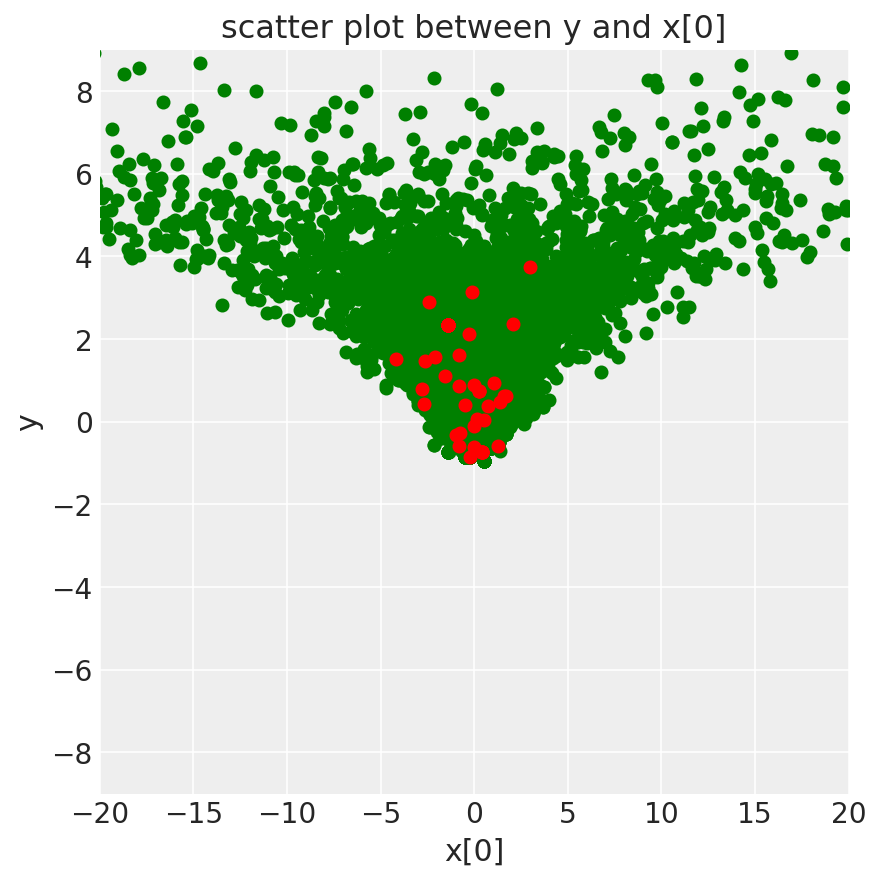

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(x0[~ divergent], y[~ divergent], color='g')
plt.scatter(x0[divergent], y[divergent], color='r')
plt.axis([-20, 20, -9, 9])
plt.ylabel('y')
plt.xlabel('x[0]')
plt.title('scatter plot between y and x[0]');

* ‰∏ä„ÅÆ„Éó„É≠„ÉÉ„Éà„ÅßÂàÜ„Åã„Çã„Çà„ÅÜ„Å´„ÄÅÂõ≥„ÅÆ‰∏ã„ÅÆÊñπ„ÅÆÈ†òÂüü„ÅßÂÖ®„Åè„Çµ„É≥„Éó„É´„ÅåÂèñ„Çâ„Çå„Å¶„ÅÑ„Å™„ÅÑ„ÄÇ

* $y$„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ
 * y„ÅÆÂë®Ëæ∫ÂàÜÂ∏ÉÔºà‰∏ã„ÅÆÂºèÔºâ„ÅØÊ≠£Ë¶èÂàÜÂ∏É„Å´„Å™„Çã„ÅØ„Åö„Å†„Åå„Éª„Éª„Éª
$$p(y) = \idotsint p(y, x_1, \ldots, x_9) dx_1 \cdots dx_9$$

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self._figure.tight_layout(*args, **kwargs)


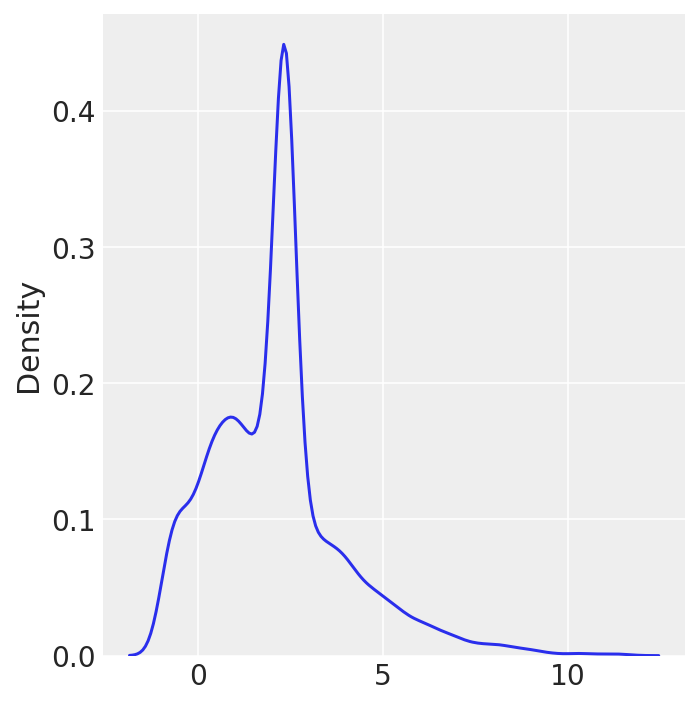

In [16]:
sns.displot(y, kind="kde");

### 5.2.2 ÂÆüË£ÖÊñπÊ≥ï (2)
* „Åì„Çå„ÅØ„ÄÅreparameterization„Çí‰Ωø„ÅÜ„Åì„Å®„ÅßÊîπËâØ„Åï„Çå„ÅüÂÆüË£Ö„ÄÇ
 * divergent transition„ÅØËµ∑„Åì„Çâ„Å™„ÅÑ„ÄÇ
 * $y$„ÅÆ„Çµ„É≥„Éó„É´„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇÇÊ≠£Ë¶èÂàÜÂ∏É„ÅÆÂΩ¢„ÇíÁ§∫„Åô„ÄÇ

* ÂÖÉ„ÅÆ„É¢„Éá„É´„ÅØ
$$\begin{align} 
y & \sim N(0, 3^2) \\
x_i & \sim N(0, e^y), \text{ $i=1,\ldots, 9$ }  
\end{align}$$


* $x_i$„Çí$N(0, e^y)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„ÄÅ„Å®„ÅÑ„ÅÜÂÆüË£Ö„Çí„ÇÑ„ÇÅ„Å¶„ÄÅ‰ª£„Çè„Çä„Å´
 * „Åæ„Åö$x_\text{raw}$„Çí$N(0,1)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åó„Éª„Éª„Éª
 * „Åù„ÅÆ$x_\text{raw}$„Çí$x = e^{y/2} x_\text{raw}$„Å®„ÅÑ„ÅÜÂºè„ÅßÂ§âÊèõ„Åó„Å¶„ÅÑ„Çã„ÄÇ

In [17]:
with pm.Model() as model_revised:
  y = pm.Normal("y", mu=0, sd=3)
  x_raw = pm.Normal("x_raw", mu=0, sd=1, shape=9)
  x = pm.Deterministic("x", (y/2).exp() * x_raw)

In [18]:
with model_revised:
  trace_revised = pm.sample(2000, cores=4, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x_raw, y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


In [19]:
x0 = trace_revised['x'][:, 0]
y = trace_revised['y']
divergent = trace_revised['diverging']

In [20]:
divergent.sum()

0

Text(0.5, 1.0, 'scatter plot between y and x[0]')

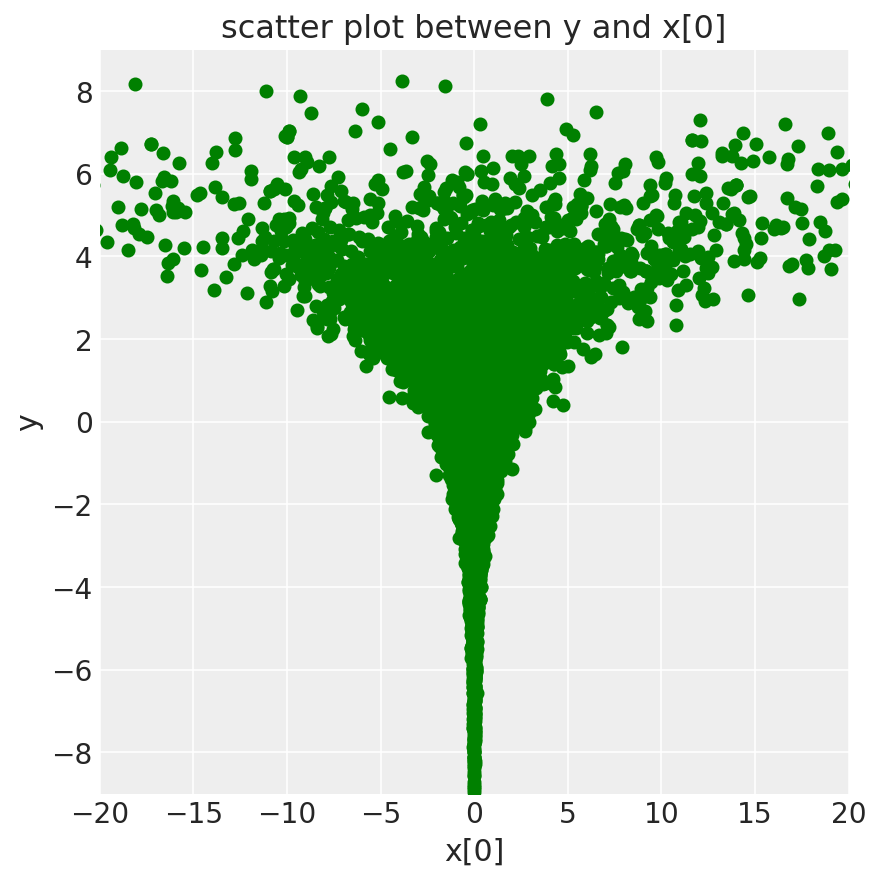

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(x0[~ divergent], y[~ divergent], color='g')
plt.scatter(x0[divergent], y[divergent], color='r')
plt.axis([-20, 20, -9, 9])
plt.ylabel('y')
plt.xlabel('x[0]')
plt.title('scatter plot between y and x[0]')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self._figure.tight_layout(*args, **kwargs)


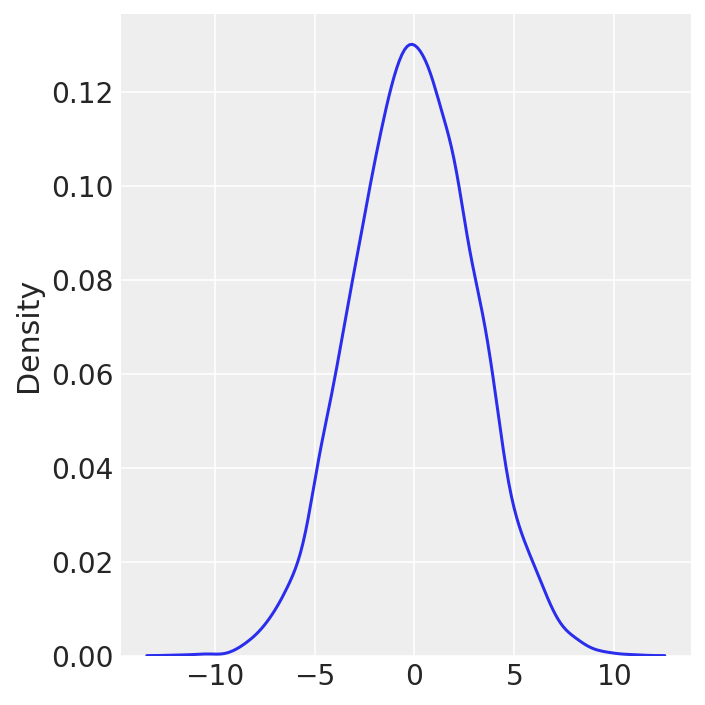

In [22]:
sns.displot(y, kind="kde")

## 5.3 The Eight Schools Model
* ‰∏ãË®òWeb„Éö„Éº„Ç∏„Å´„ÅÇ„Çã„ÄåA Centered Eight Schools Implementation„Äç„ÅÆÂÆüÈ®ì„ÇíÂÜçÁèæ„Åó„Å¶„Åø„Çã„ÄÇ
 * https://docs.pymc.io/en/v3/pymc-examples/examples/diagnostics_and_criticism/Diagnosing_biased_Inference_with_Divergences.html




> "Hamiltonian Monte Carlo, for example, is especially powerful in this regard as its failures to be geometrically ergodic with respect to any target distribution manifest in distinct behaviors that have been developed into sensitive diagnostics. One of these behaviors is the appearance of divergences that indicate the Hamiltonian Markov chain has encountered regions of high curvature in the target distribution which it cannot adequately explore."



* arvizÂêë„Åë„Å´„Ç≥„Éº„Éâ„ÇíÊõ∏„ÅçÁõ¥„Åó„Åü„ÄÇ

### 5.5.1 „Éá„Éº„Çø„Çª„ÉÉ„Éà
* `y`„ÅåË¶≥Ê∏¨„Éá„Éº„Çø
 * ÂêÑÊ†°„ÅßÂêå„Åò„Ç≥„Éº„ÉÅ„É≥„Ç∞„ÇíÂÆüÊñΩ„Åó„ÄÅ„Åù„ÅÆÂâçÂæå„ÅßÂ≠¶Âäõ„ÉÜ„Çπ„Éà„ÅÆÁÇπÊï∞„Åå„Å©„ÅÜÂ§âÂåñ„Åó„Åü„Åã„ÇíË°®„Åô„ÄÇ
 * cf. https://tjo.hatenablog.com/entry/2020/03/23/231206
* `sigma`„ÅåÊó¢Áü•„ÅÆ„Éë„É©„É°„Éº„Çø

In [23]:
# Data of the Eight Schools Model
y = np.asarray([28,  8, -3,  7, -1,  1, 18, 12], dtype=float)
sigma = np.asarray([15, 10, 16, 11,  9, 11, 10, 18], dtype=float)
J = y.shape[0]

* „Åì„ÅÆ„Éá„Éº„Çø„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´„É¢„Éá„É™„É≥„Ç∞„Åô„Çã„ÄÇ
$$\begin{align}
\mu & \sim N(0,5) \notag \\
\tau & \sim \text{Half-Cauchy}(5) \\
\theta_n & \sim N(\mu, \tau) \\
y_n & \sim N(\theta_n, \sigma_n^2)
\end{align}$$
 * $y_n$„Åå‰∏äË®ò„Ç≥„Éº„Éâ„ÅÆ`y`„Å´ÂØæÂøú„Åô„Çã„ÄÇ
 * $\sigma_n$„Åå‰∏äË®ò„Ç≥„Éº„Éâ„ÅÆ`sigma`„Å´ÂØæÂøú„Åô„Çã„ÄÇ

* Half-cauchyÂàÜÂ∏É„Å´„Å§„ÅÑ„Å¶„ÅØ‰∏ãË®ò„Éö„Éº„Ç∏„ÇíÂèÇÁÖß
 * https://distribution-explorer.github.io/continuous/halfcauchy.html
> "The Half-Cauchy distribution with ùúá=0 is a useful prior for nonnegative parameters that may be very large, as allowed by the very heavy tails of the Half-Cauchy distribution."

### 5.5.2 ÂÆüË£ÖÊñπÊ≥ï(1)
* „Åì„Çå„ÅØËâØ„Åè„Å™„ÅÑÂÆüË£ÖÊñπÊ≥ï„ÄÇ
 * Âæå„Åßreparameterization„Çí‰Ωø„Å£„Å¶ÊîπËâØ„Åô„Çã„ÄÇ

In [24]:
with pm.Model() as Centered_eight:
  mu = pm.Normal('mu', mu=0, sd=5)
  tau = pm.HalfCauchy('tau', beta=5)
  theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
  obs = pm.Normal('obs', mu=theta, sd=sigma, observed=y)

* `return_inferencedata=True`„Å®„Åó„Å¶arvizÂêë„Åë„ÅÆ„Çµ„É≥„Éó„É™„É≥„Ç∞ÁµêÊûú„Éá„Éº„Çø„ÇíÂæó„Çã„ÄÇ„ÄÄ

In [25]:
with Centered_eight:
  trace = pm.sample(2000, cores=4, random_seed=SEED, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6715532133279446, but should be close to 0.8. Try to increase the number of tuning steps.
There were 88 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6048750546796846, but should be close to 0.8. Try to increase the number of tuning steps.
There were 191 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6692396693610554, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampl

In [26]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu        4.614  3.458  -1.546   10.691      0.369    0.349      95.0   
theta[0]  6.446  5.571  -3.502   17.088      0.207    0.146     475.0   
theta[1]  5.111  4.826  -3.881   14.014      0.316    0.224     214.0   
theta[2]  4.070  5.538  -6.959   13.735      0.356    0.252     183.0   
theta[3]  5.085  4.896  -4.079   14.007      0.299    0.211     229.0   
theta[4]  3.849  4.876  -5.607   12.040      0.421    0.323     123.0   
theta[5]  4.234  4.913  -4.618   13.629      0.362    0.277     181.0   
theta[6]  6.580  5.095  -2.557   16.438      0.220    0.156     407.0   
theta[7]  4.899  5.496  -6.172   14.211      0.256    0.181     315.0   
tau       3.814  3.087   0.485    9.406      0.224    0.158      58.0   

          ess_tail  r_hat  
mu          1766.0   1.04  
theta[0]    2518.0   1.02  
theta[1]    3241.0   1.02  
theta[2]    2581.0   1.02  
theta[3]    2896.0   1.02  
theta[4]    2340.0   1.03  
theta[5]    2609.0   1.02  
theta[6]    3032.0   1.01  
theta[7]    2840.0   1.02  
tau           18.0   1.07

* `r_hat`„Åå1.0„Åã„ÇâÈõ¢„Çå„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„ÇÇ„ÅÇ„Çã„ÄÇ
* `tau`„Å´ÂïèÈ°å„Åå„ÅÇ„Çä„Åù„ÅÜ„ÄÇ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.


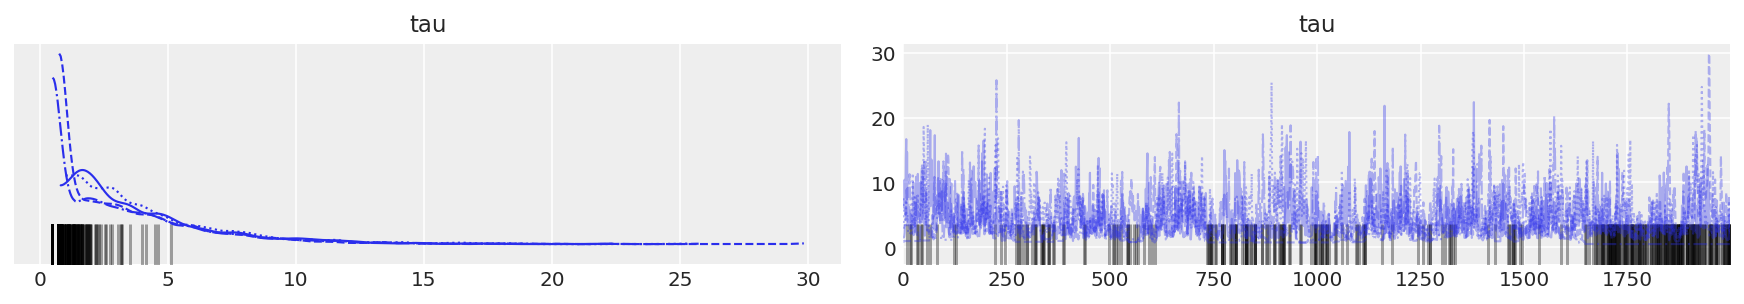

In [27]:
pm.traceplot(trace, var_names=['tau']);

* „Åì„ÅÆ„Éá„Éº„Çø„Å´„Å§„ÅÑ„Å¶„ÅØ$\tau$„ÅÆ"Áúü„ÅÆÂÄ§"„ÅåÂàÜ„Åã„Å£„Å¶„ÅÑ„Çã„Çâ„Åó„ÅÑ„ÄÇ
 * "Áúü„ÅÆÂÄ§"„ÅÆË©≥Á¥∞„ÅØ https://discourse.pymc.io/t/how-is-the-true-value-of-tau-in-the-eight-schools-model-known/1932
* log„Çπ„Ç±„Éº„É´„Åß„Éó„É≠„ÉÉ„Éà„Åó„Å¶„ÄÅÁúü„ÅÆÂÄ§„Åã„Çâ„ÅÆ„Ç∫„É¨„ÇíË¶ã„Å¶„Åø„Çã„ÄÇ
 * $\log \tau$„ÅÆÁúü„ÅÆÂÄ§„ÅØ0.7657852„Çâ„Åó„ÅÑ„Åß„Åô„ÄÇ

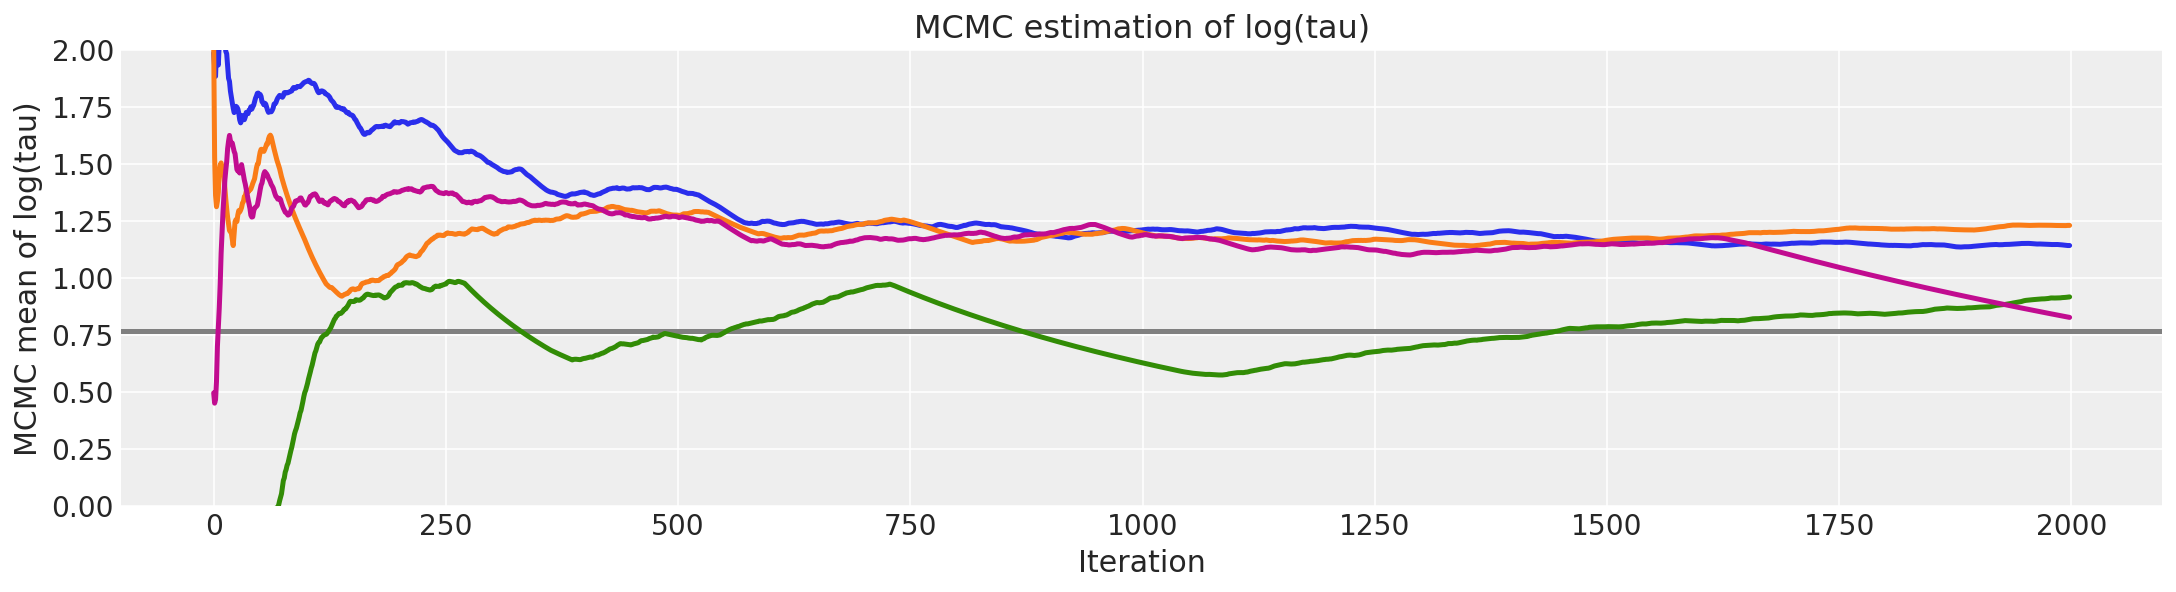

In [28]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)');

In [29]:
trace.sample_stats

<xarray.Dataset>
Dimensions:             (chain: 4, draw: 2000)
Coordinates:
  * chain               (chain) int64 0 1 2 3
  * draw                (draw) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables: (12/13)
    n_steps             (chain, draw) float64 15.0 15.0 31.0 ... 1.0 2.0 2.0
    diverging           (chain, draw) bool False False False ... True True True
    step_size_bar       (chain, draw) float64 0.3001 0.3001 ... 0.2213 0.2213
    step_size           (chain, draw) float64 0.2681 0.2681 ... 0.4188 0.4188
    energy              (chain, draw) float64 60.97 65.41 67.0 ... 43.24 43.38
    process_time_diff   (chain, draw) float64 0.003697 0.004062 ... 0.0006379
    ...                  ...
    acceptance_rate     (chain, draw) float64 0.9858 0.9792 ... 5.651e-123
    perf_counter_start  (chain, draw) float64 242.6 242.6 242.6 ... 258.4 258.4
    lp                  (chain, draw) float64 -59.58 -60.79 ... -41.07 -41.07
    tree_depth          (chain, draw) int64 4 4 5 5 4 4 4 4 ... 1 3 2 2 1 1 2 2
    energy_error        (chain, draw) float64 0.03561 -0.02173 ... 0.0 0.0
    max_energy_error    (chain, draw) float64 1.114 0.154 ... 1.024e+03
Attributes:
    created_at:                 2022-03-07T04:27:22.036781
    arviz_version:              0.11.4
    inference_library:          pymc3
    inference_library_version:  3.11.4
    sampling_time:              23.856504440307617
    tuning_steps:               1000

In [30]:
trace.sample_stats.diverging

<xarray.DataArray 'diverging' (chain: 4, draw: 2000)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

In [31]:
chain_id = 0
divergent = trace.sample_stats.diverging.data[chain_id]

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

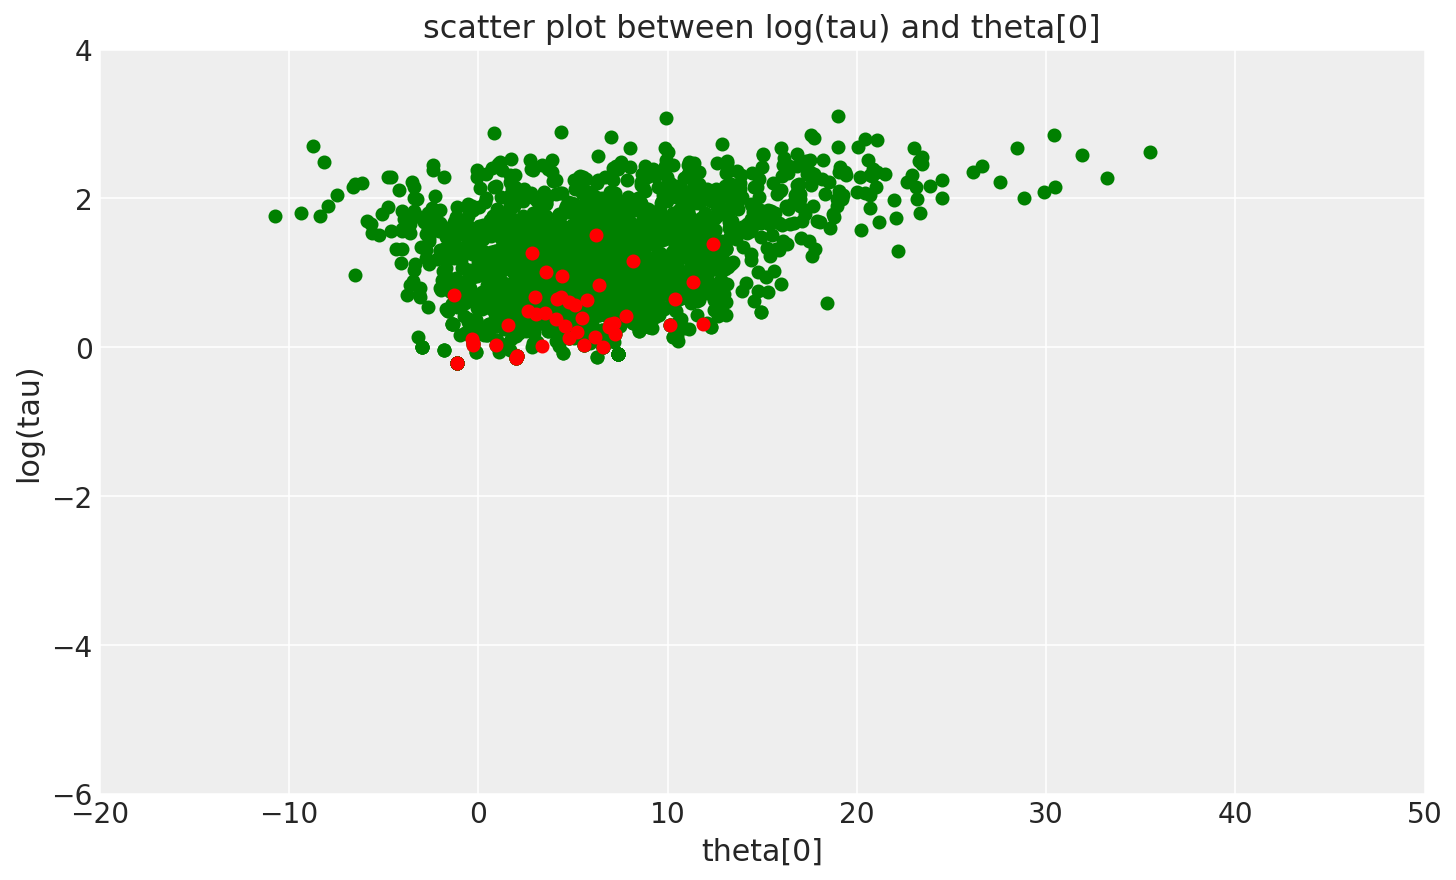

In [32]:
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

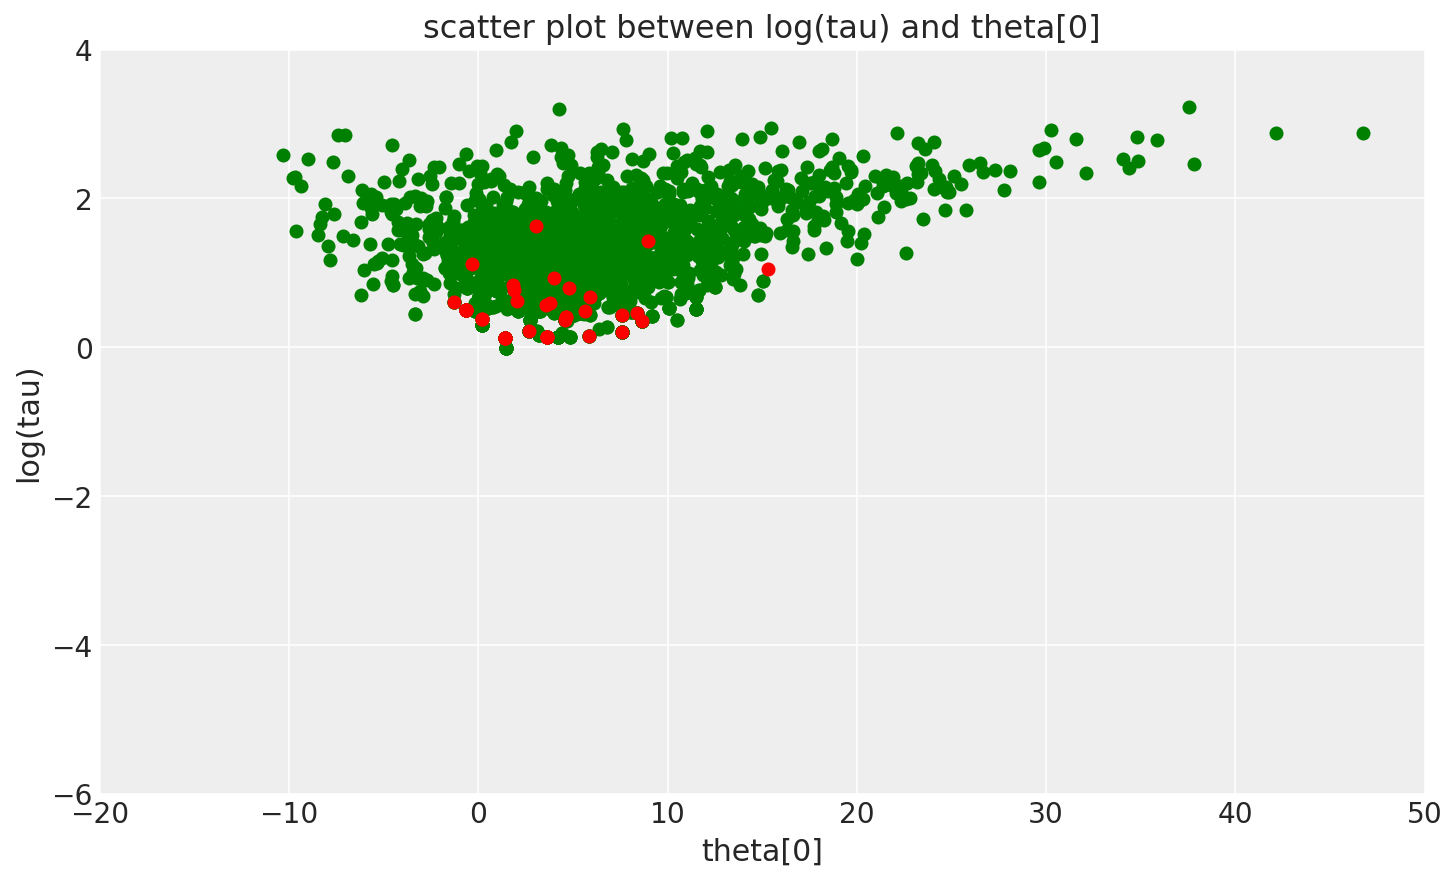

In [33]:
chain_id = 1
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

### 5.5.3 ÂÆüË£ÖÊñπÊ≥ï(2)
* reparameterization„Çí‰Ωø„ÅÜ„ÄÇ

* $\theta_i$„Çí$N(\mu, \tau)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åô„Çã„ÄÅ„Å®„ÅÑ„ÅÜÂÆüË£Ö„Çí„ÇÑ„ÇÅ„Å¶„ÄÅ‰ª£„Çè„Çä„Å´
 * „Åæ„Åö$\tilde{\theta}_i$„Çí$N(0,1)$„Åã„Çâ„Çµ„É≥„Éó„É™„É≥„Ç∞„Åó„Éª„Éª„Éª
 * „Åù„ÅÆ$\tilde{\theta}_i$„Çí$\theta_i = \mu + \tau \tilde{\theta}_i$„Å®„ÅÑ„ÅÜÂºè„ÅßÂ§âÊèõ„Åó„Å¶„ÅÑ„Çã„ÄÇ

In [34]:
with pm.Model() as NonCentered_eight:
  mu = pm.Normal('mu', mu=0, sd=5)
  tau = pm.HalfCauchy('tau', beta=5)
  theta_tilde = pm.Normal('theta_t', mu=0, sd=1, shape=J)
  theta = pm.Deterministic('theta', mu + tau * theta_tilde) # „Åì„Åì„Åßreparameterization„Çí‰ΩøÁî®
  obs = pm.Normal('obs', mu=theta, sd=sigma, observed=y)

In [35]:
with NonCentered_eight:
  trace = pm.sample(2000, cores=4, random_seed=SEED, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


In [36]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu          4.400  3.333  -2.032   10.468      0.042    0.031    6317.0   
theta_t[0]  0.313  0.984  -1.487    2.173      0.011    0.011    7792.0   
theta_t[1]  0.084  0.942  -1.671    1.874      0.010    0.011    8553.0   
theta_t[2] -0.099  0.976  -1.945    1.755      0.011    0.012    7847.0   
theta_t[3]  0.086  0.934  -1.607    1.906      0.010    0.011    8265.0   
theta_t[4] -0.174  0.920  -1.882    1.549      0.011    0.011    7477.0   
theta_t[5] -0.068  0.931  -1.864    1.684      0.011    0.011    6734.0   
theta_t[6]  0.355  0.976  -1.503    2.166      0.011    0.012    7649.0   
theta_t[7]  0.095  0.986  -1.769    1.884      0.012    0.012    7074.0   
tau         3.686  3.264   0.001    9.398      0.058    0.045    3107.0   
theta[0]    6.181  5.493  -4.309   16.381      0.076    0.060    5751.0   
theta[1]    4.942  4.723  -4.219   13.617      0.060    0.052    6627.0   
theta[2]    3.905  5.322  -6.180   14.390      0.072    0.055    6212.0   
theta[3]    4.801  4.789  -4.807   13.482      0.059    0.045    6829.0   
theta[4]    3.614  4.688  -5.481   12.284      0.056    0.045    7323.0   
theta[5]    4.051  4.812  -5.253   12.741      0.060    0.045    6713.0   
theta[6]    6.323  5.120  -2.710   16.127      0.064    0.049    6737.0   
theta[7]    4.964  5.523  -5.699   15.091      0.080    0.070    5526.0   

            ess_tail  r_hat  
mu            4290.0    1.0  
theta_t[0]    5166.0    1.0  
theta_t[1]    5254.0    1.0  
theta_t[2]    4898.0    1.0  
theta_t[3]    4960.0    1.0  
theta_t[4]    4929.0    1.0  
theta_t[5]    5004.0    1.0  
theta_t[6]    4791.0    1.0  
theta_t[7]    4614.0    1.0  
tau           2914.0    1.0  
theta[0]      3822.0    1.0  
theta[1]      4853.0    1.0  
theta[2]      4223.0    1.0  
theta[3]      4403.0    1.0  
theta[4]      4584.0    1.0  
theta[5]      4747.0    1.0  
theta[6]      4430.0    1.0  
theta[7]      4009.0    1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcabe3db6d0>,
      dtype=object)

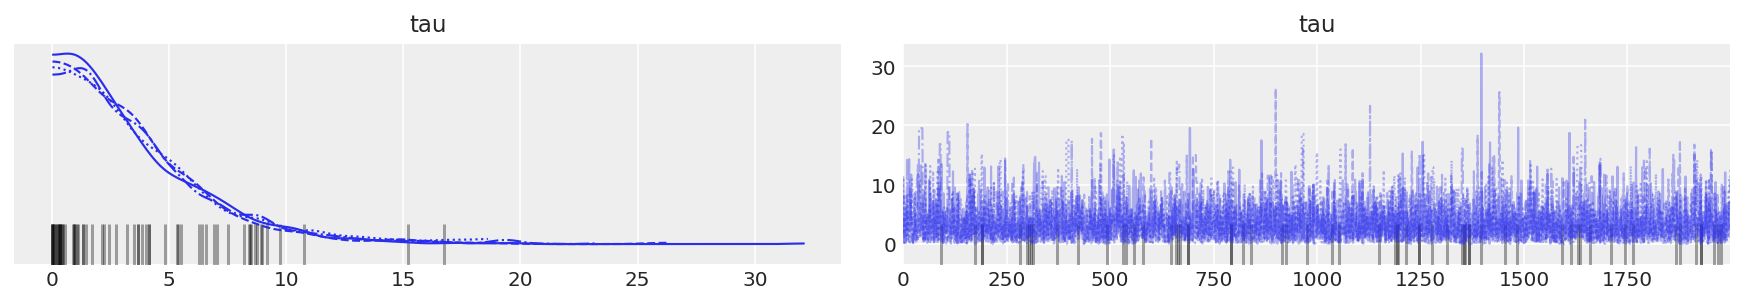

In [37]:
pm.traceplot(trace, var_names=['tau'])

Text(0.5, 1.0, 'MCMC estimation of log(tau)')

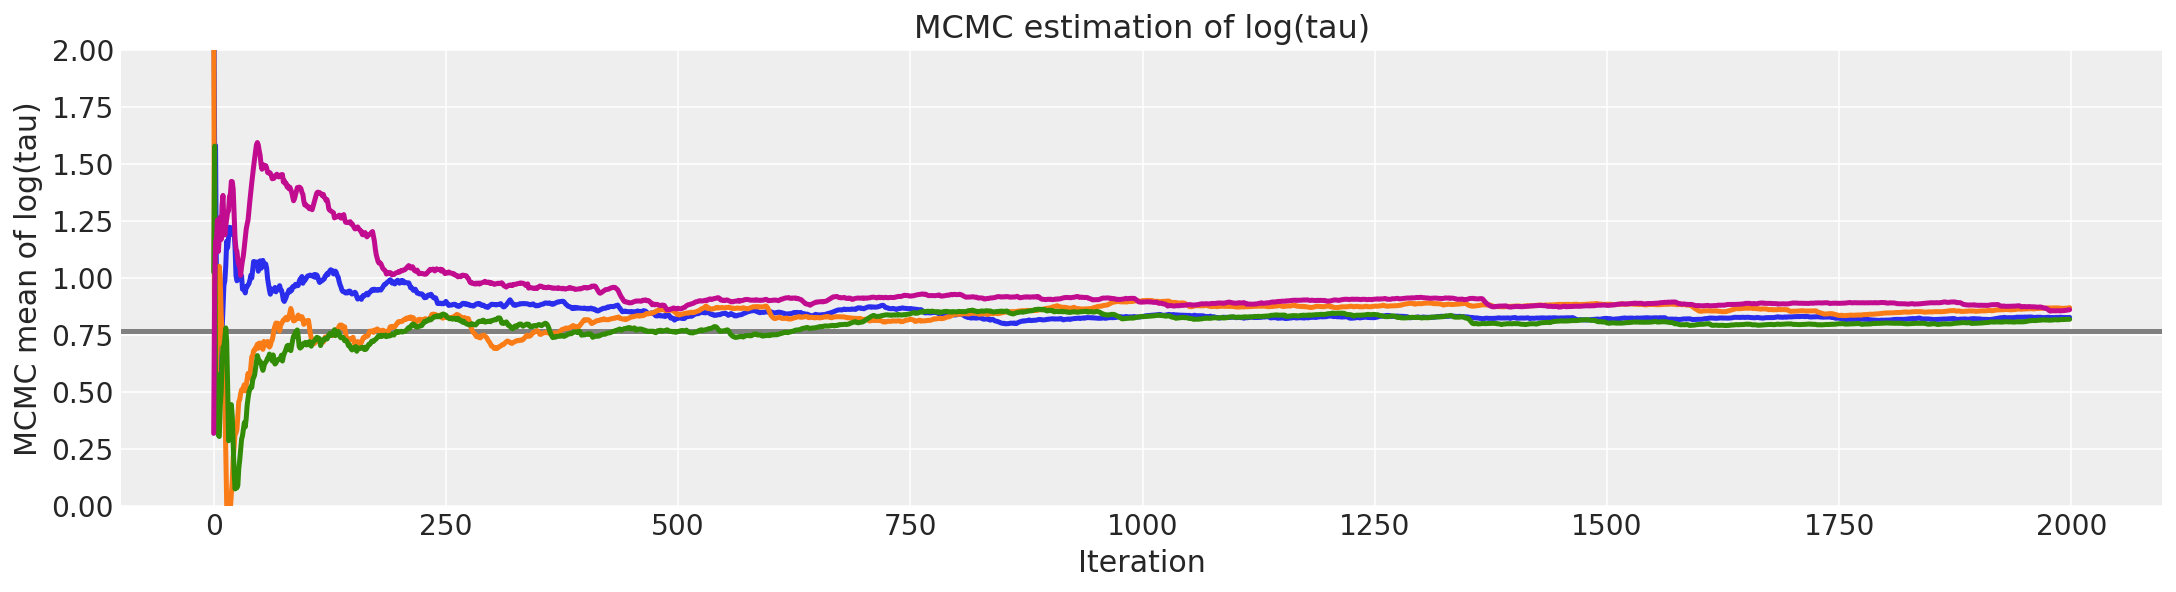

In [38]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

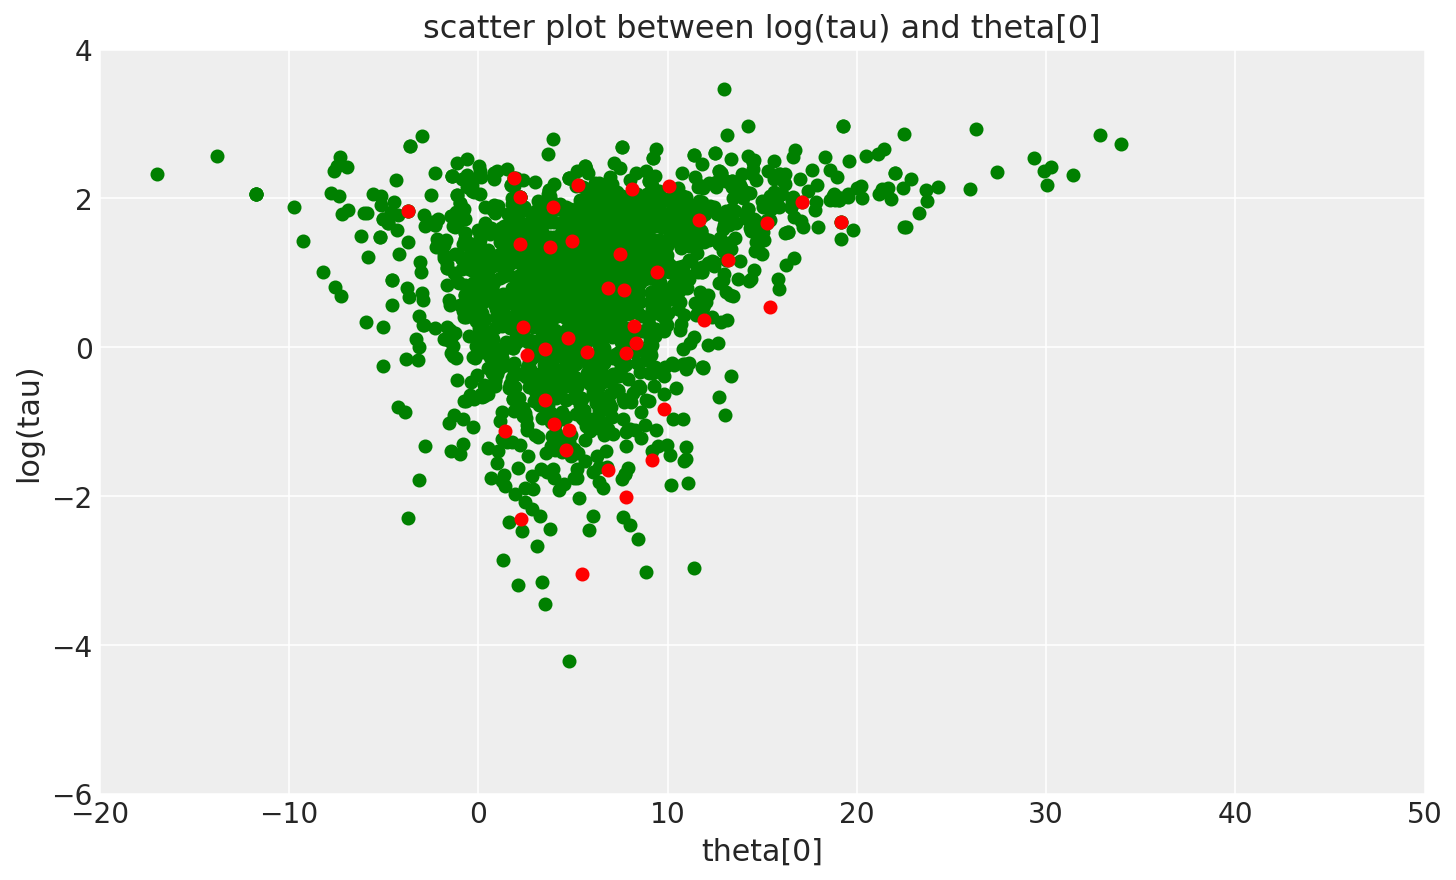

In [39]:
chain_id = 0
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

Text(0.5, 1.0, 'scatter plot between log(tau) and theta[0]')

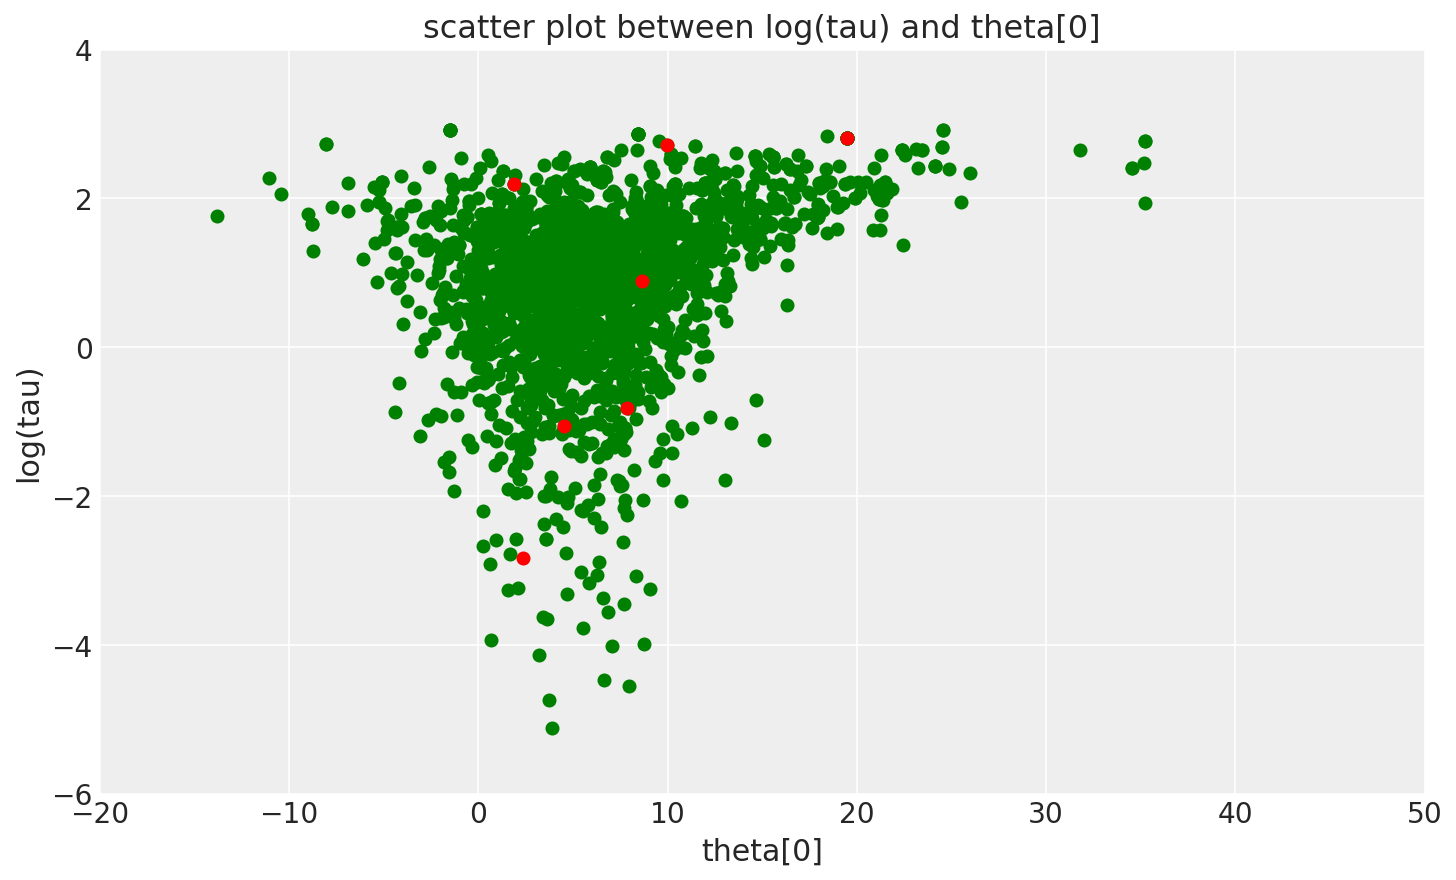

In [40]:
chain_id = 1
divergent = trace.sample_stats.diverging.data[chain_id]
theta_trace = trace.posterior['theta'][chain_id]
theta0 = theta_trace[:,0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[~divergent], logtau[chain_id][~divergent], color='g')
plt.scatter(theta0[divergent], logtau[chain_id][divergent], color='r')
plt.axis([-20, 50, -6, 4])
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')

### 5.5.4 Êé°ÊäûÁéá(acceptance rate)„ÇíË™øÊï¥„Åô„Çã

> "target_accept : float in [0, 1]. The step size is tuned such that we approximate this acceptance rate. Higher values like 0.9 or 0.95 often work better for problematic posteriors." (https://docs.pymc.io/api/inference.html ) 


In [41]:
with NonCentered_eight:
  step = pm.NUTS(target_accept=.90)
  trace = pm.sample(2000, step=step, cores=4, random_seed=SEED, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


In [42]:
with NonCentered_eight:
  step = pm.NUTS(target_accept=.95)
  trace = pm.sample(2000, step=step, cores=4, random_seed=SEED, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_t, tau, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


Text(0.5, 1.0, 'MCMC estimation of log(tau)')

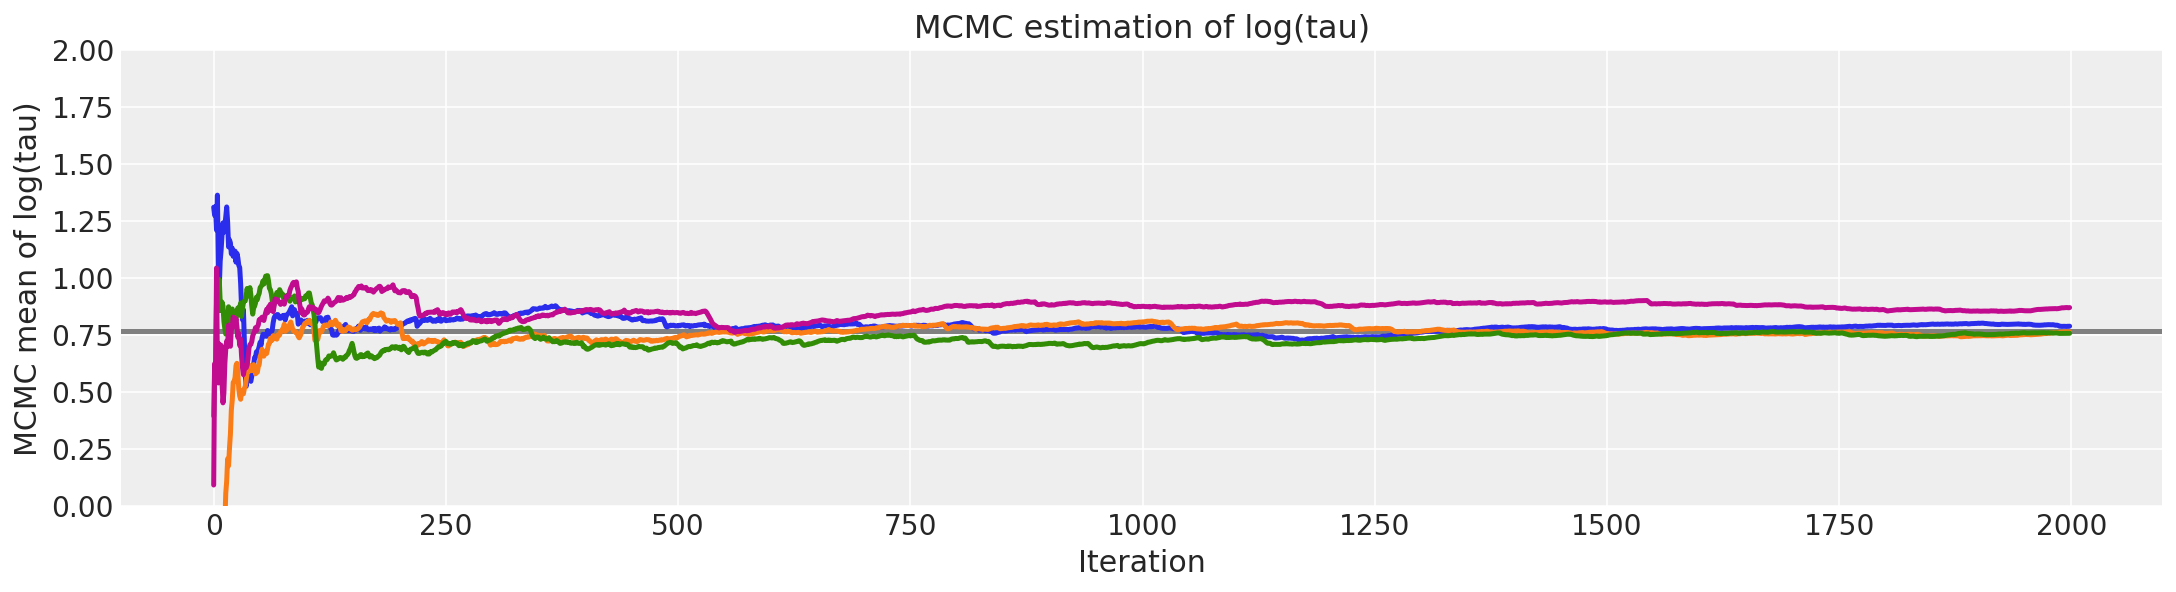

In [43]:
logtau = np.log(trace.posterior['tau'].data)
plt.figure(figsize=(15, 4))
plt.axhline(0.7657852, lw=2.5, color='gray')
for j in range(logtau.shape[0]):
  mlogtau = [np.mean(logtau[j,:i]) for i in np.arange(1, len(logtau[j]))]
  plt.plot(mlogtau, lw=2.5)
plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)')